In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') #Supress warnings in notebook

In [80]:
df = pd.read_csv('/content/realtor-data.csv', dtype_backend='pyarrow')
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3,2,0.12,1962661.0,Adjuntas,Puerto Rico,601,920.0,<NA>
1,52707.0,for_sale,80000.0,4,2,0.08,1902874.0,Adjuntas,Puerto Rico,601,1527.0,<NA>
2,103379.0,for_sale,67000.0,2,1,0.15,1404990.0,Juana Diaz,Puerto Rico,795,748.0,<NA>
3,31239.0,for_sale,145000.0,4,2,0.1,1947675.0,Ponce,Puerto Rico,731,1800.0,<NA>
4,34632.0,for_sale,65000.0,6,2,0.05,331151.0,Mayaguez,Puerto Rico,680,<NA>,<NA>


##Descreptive Statistics

In [81]:
#Total Records
len(df)

2226382

In [82]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2221849.0,2224841.0,1745065.0,1714611.0,1900793.0,2215516.0,2226083.0,1657898.0
mean,52939.893287,524195.519291,3.275841,2.49644,15.223027,1012324.920665,52186.676341,2714.471335
std,30642.752884,2138893.221114,1.567274,1.652573,762.823802,583763.478326,28954.084538,808163.519748
min,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0
25%,23861.0,165000.0,3.0,2.0,0.15,506312.75,29617.0,1300.0
50%,52884.0,325000.0,3.0,2.0,0.26,1012765.5,48382.0,1760.0
75%,79183.0,550000.0,4.0,3.0,0.98,1521173.25,78070.0,2413.0
max,110142.0,2147483600.0,473.0,830.0,100000.0,2001357.0,99999.0,1040400400.0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype          
---  ------          -----          
 0   brokered_by     double[pyarrow]
 1   status          string[pyarrow]
 2   price           double[pyarrow]
 3   bed             int64[pyarrow] 
 4   bath            int64[pyarrow] 
 5   acre_lot        double[pyarrow]
 6   street          double[pyarrow]
 7   city            string[pyarrow]
 8   state           string[pyarrow]
 9   zip_code        int64[pyarrow] 
 10  house_size      double[pyarrow]
 11  prev_sold_date  string[pyarrow]
dtypes: double[pyarrow](5), int64[pyarrow](3), string[pyarrow](4)
memory usage: 237.5 MB


In [84]:
#city, status and  state need to be changed into categorical and prev_sold_date to date/time
df['status'] = df.status.astype('category')
df['state'] = df.state.astype('category')
df['city'] = df.city.astype('category')

df['prev_sold_date'] = pd.to_datetime(df.prev_sold_date,
                                      format='mixed',
                                      errors = 'coerce')

In [85]:
#unique states
df.state.unique()

['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut', 'New Hampshire', ..., 'Washington', 'Arizona', 'Hawaii', 'Guam', 'Alaska']
Length: 56
Categories (55, string[pyarrow]): [Alabama, Alaska, Arizona, Arkansas, ..., Washington,
                                   West Virginia, Wisconsin, Wyoming]

In [86]:
#missing values summary
missing_values = df.isna().sum().to_frame('Values')
missing_values['Percentage'] = round(missing_values.Values/len(df)*100,2)

missing_values = missing_values.sort_values('Values')

print(missing_values)

                Values  Percentage
status               0        0.00
state                8        0.00
zip_code           299        0.01
city              1407        0.06
price             1541        0.07
brokered_by       4533        0.20
street           10866        0.49
acre_lot        325589       14.62
bed             481317       21.62
bath            511771       22.99
house_size      568484       25.53
prev_sold_date  734298       32.98


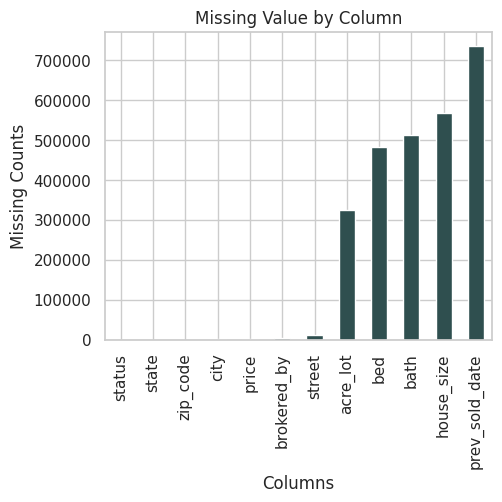

In [87]:
plt.figure(figsize=(5,4))
missing_values.Values.plot.bar(color='darkslategrey')
plt.title('Missing Value by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Counts')
plt.show()

#Data Wrangling and Cleaning

In [88]:
data = df.copy()

In [89]:
duplicates = data.duplicated().sum()
print(f'Total Duplicates: {duplicates}')

Total Duplicates: 0


In [90]:
data.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

##Outliers Identification

In [91]:
#Lets see unique values for number of baths and beds before adjustment
data.bath.nunique(),data.bed.nunique()

(86, 99)

In [92]:
'''
we will remove items with baths more than 5
and beds more than 5 essentially to remove wrong entires
'''
data = data[(data['bath'] <= 5) & (data['bed'] <= 5)]

In [93]:
#Lets see unique values for number of baths and beds after adjustment
data.bath.nunique(),data.bed.nunique()

(5, 5)

In [94]:
#create subplots
def create_boxplots(data, numerical):
  #subplot dimensions
  num_plots = len(numerical)
  num_col = 2
  num_row = (num_col + num_plots -1) // num_col

  fig, axes = plt.subplots(num_row, num_col, figsize=(10,8))
  axes = axes.flatten()

  for i, col in enumerate(numerical):
    ax = axes[i]
    data[col].plot.box(ax=ax)
    ax.set_title(col)

  # hide any unused axes (if odd number of plots)
  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

In [95]:
'''
change acres lots into total area in sq ft.
as house area is in sq ft and easier for comparison and analysis
'''
data.acre_lot = data.acre_lot * 43560
data.rename(columns={'acre_lot':'total_area'}, inplace=True)

In [96]:
data.describe()

,brokered_by,price,bed,bath,total_area,street,zip_code,house_size,prev_sold_date
count,1634864.0,1636817.0,1637528.0,1637528.0,1369646.0,1631805.0,1637428.0,1546109.0,1275377
mean,52885.696701,510657.773614,3.121936,2.374176,549514.447587,929376.039625,52448.600665,1920.447603,2017-11-19 17:46:04.183139328
min,0.0,0.0,1.0,1.0,0.0,63.0,601.0,4.0,1901-01-01 00:00:00
25%,24185.0,229900.0,3.0,2.0,6098.4,466995.0,29349.0,1280.0,2017-03-15 00:00:00
50%,52850.0,365000.0,3.0,2.0,9147.6,930083.0,48864.0,1711.0,2021-12-03 00:00:00
75%,79106.0,575900.0,4.0,3.0,20037.6,1389972.0,78610.0,2310.0,2022-03-07 00:00:00
max,110142.0,2147483600.0,5.0,5.0,4356000000.0,2001321.0,99999.0,1560780.0,2026-04-08 00:00:00
std,30515.261766,1873290.54786,0.920486,0.926516,35166675.171345,533623.971108,29590.553244,3686.177586,NaN


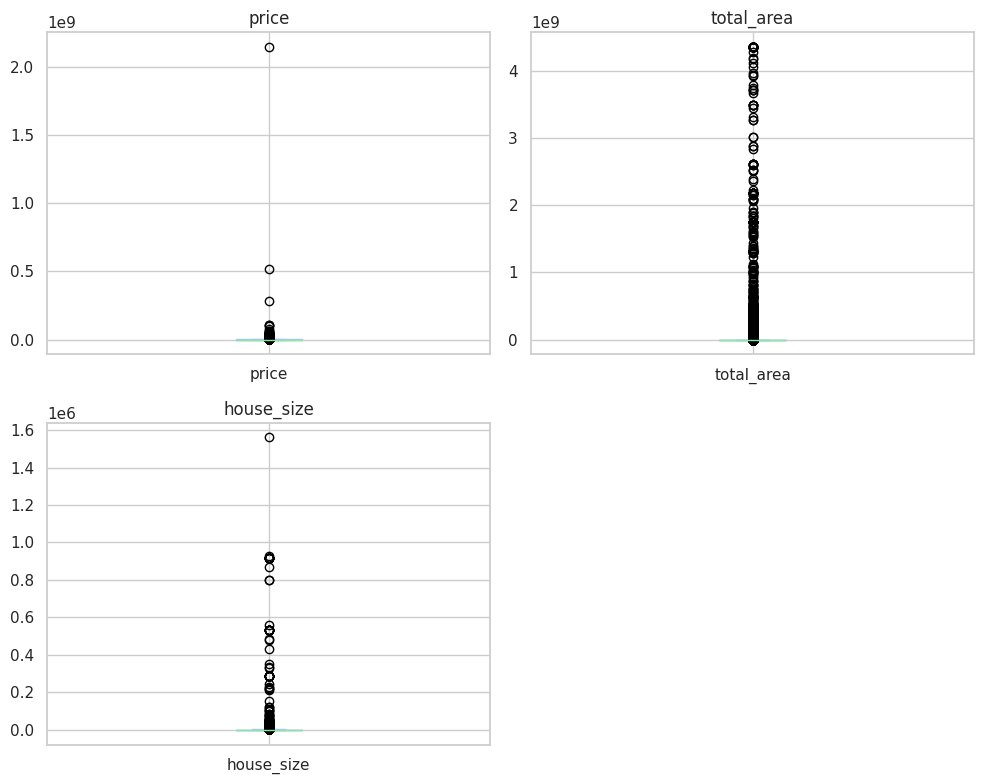

In [97]:
''' For price, bed, bath, acre and house size we need to identify
outliers for accurate analysis and prediction '''

numerical = ['price','total_area','house_size']
#Box plot before outliers
create_boxplots(data, numerical)

In [98]:
#function to remove outliers uing Inter Quartile Range
def remove_outliers(data, col):
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)

  IQR = q3 - q1

  lower_bound = q1 - 1.5 * IQR
  upper_bound = q3 + 1.5 * IQR

  #filter data based on the bounds
  result = data[(data[col]>=lower_bound) & (data[col]<=upper_bound)]

  return result

In [99]:
#before outlier removel
initial_size = data.shape[0]

#remove outliers
for col in numerical:
  data = remove_outliers(data, col)

#after outlier removal
final_size = data.shape[0]

print(f'Total Outliers removed: {(initial_size-final_size):,}')

Total Outliers removed: 643,308


In [100]:
#After removing the outliers
print(f'Final Dataset Size: {data.shape[0]:,}')

Final Dataset Size: 994,220


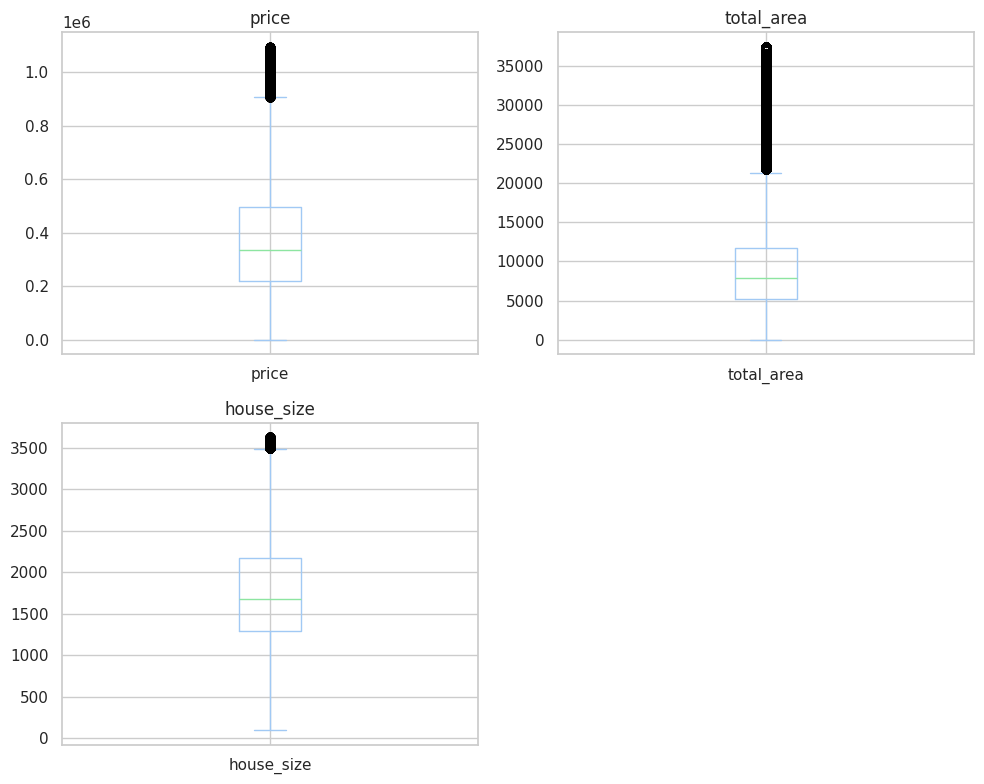

In [101]:
#Mapping boxplots after outlier removals
create_boxplots(data, numerical)

Key Insights:  
We can see from the varying box plots that it is very likely that the dataset had a lot of worng entires with inflated total area, house size and prices.
   
Before Removing the outliers max house price, total area and house were:
$2,147,483,600.00, 4,356,000,000 sq.ft and 	1,560,780 sq.ft respectively which does not make sense. Outlier removal has accounted for that making the data now, ideal for analysis and modeling.

## Removing Records with no Pricing and Total Area  
This is necessary because data points without pirce and land size would be meaningless for analysis.

In [102]:
data.shape[0] #before

994220

In [103]:
data = data[(data.price != 0) & (data.total_area != 0)]

In [104]:
data.shape[0] #after

992546

## Remove records with more than 3 missing values

In [105]:
#missing value per records
missing_count_before = data.isnull().sum(axis=1).value_counts().sort_index()

for col_count, row_count in missing_count_before.items():
  print(f'{col_count:,} missing in {row_count:,} records.')

0 missing in 809,698 records.
1 missing in 181,911 records.
2 missing in 913 records.
3 missing in 9 records.
4 missing in 15 records.


In [106]:
#filter data by missing values, remove records with more that 3 missing values
data_clean = data[data.isnull().sum(axis=1) < 3].copy()

missing_count_after = data_clean.isnull().sum(axis=1).value_counts().sort_index()

for col_count, row_count in missing_count_after.items():
  print(f'{col_count:,} missing in {row_count:,} records.')

0 missing in 809,698 records.
1 missing in 181,911 records.
2 missing in 913 records.


In [107]:
data_clean.shape[0]

992522

### Filling Missing Data

In [108]:
data_clean[data_clean.isnull().sum(axis=1) > 1].head() #records with more than1 missing value

,brokered_by,status,price,bed,bath,total_area,street,city,state,zip_code,house_size,prev_sold_date
397,34000.0,for_sale,300000.0,4,4,3049.2,<NA>,Dorado,Puerto Rico,646,3090.0,NaT
407,62066.0,for_sale,58000.0,3,1,2178.0,965293.0,Ponce,Puerto Rico,<NA>,790.0,NaT
749,92147.0,for_sale,82700.0,2,2,1306.8,1913261.0,Ciales,Puerto Rico,<NA>,1111.0,NaT
948,76109.0,for_sale,715000.0,4,3,4791.6,<NA>,Vega Alta,Puerto Rico,692,2800.0,NaT
1215,92147.0,for_sale,110100.0,3,2,2613.6,917992.0,Toa Alta,Puerto Rico,<NA>,1126.0,NaT


In [109]:
## create function to fill missing values based on variable type

def fill_empty(df):
  for col in df.columns:

    #if column is category or object fill na with Unknown
    if pd.api.types.is_categorical_dtype(df[col]):
      if 'Unknown' not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories(['Unknown'])
      df[col] = df[col].fillna('Unknown')
    elif df[col].dtype == object:
      df[col] = df[col].fillna('Unknown')

    #if values are numeric fill with mean
    elif pd.api.types.is_numeric_dtype(df[col]):
      col_mean = np.floor(df[col].mean())
      df[col] = df[col].fillna(col_mean)

  return df

In [110]:
#fill na for the clean data
data_clean = fill_empty(data_clean)

In [111]:
data_clean.head()

,brokered_by,status,price,bed,bath,total_area,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3,2,5227.2,1962661.0,Adjuntas,Puerto Rico,601,920.0,NaT
1,52707.0,for_sale,80000.0,4,2,3484.8,1902874.0,Adjuntas,Puerto Rico,601,1527.0,NaT
2,103379.0,for_sale,67000.0,2,1,6534.0,1404990.0,Juana Diaz,Puerto Rico,795,748.0,NaT
3,31239.0,for_sale,145000.0,4,2,4356.0,1947675.0,Ponce,Puerto Rico,731,1800.0,NaT
5,103378.0,for_sale,179000.0,4,3,20037.6,1850806.0,San Sebastian,Puerto Rico,612,2520.0,NaT


In [112]:
data_clean.isnull().sum()

,0
brokered_by,0
status,0
price,0
bed,0
bath,0
total_area,0
street,0
city,0
state,0
zip_code,0


In [113]:
#since it is not ideal to fill date colum with avg or unknow in this case we will drop the colum
data_clean.drop(columns=['prev_sold_date'], inplace=True)
print('Date colum has been dropped successfully!!')

Date colum has been dropped successfully!!


## Exploratory Data Analysis (EDA)

In [114]:
data.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'total_area', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

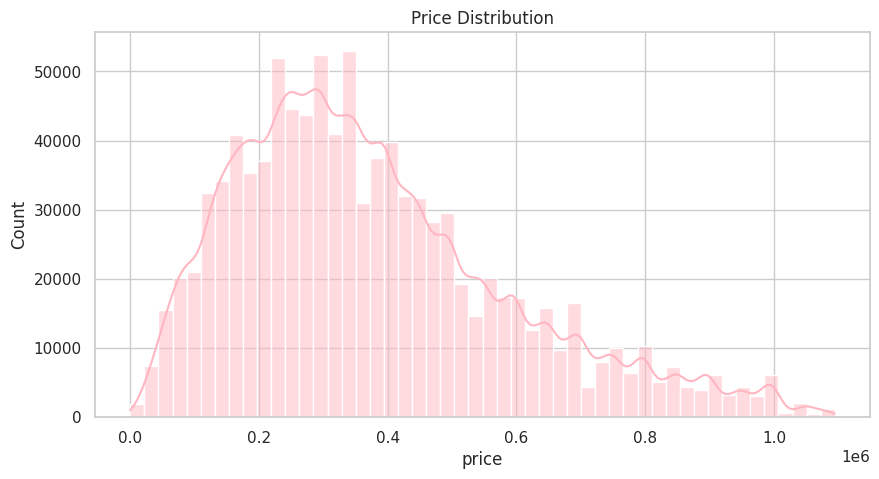

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


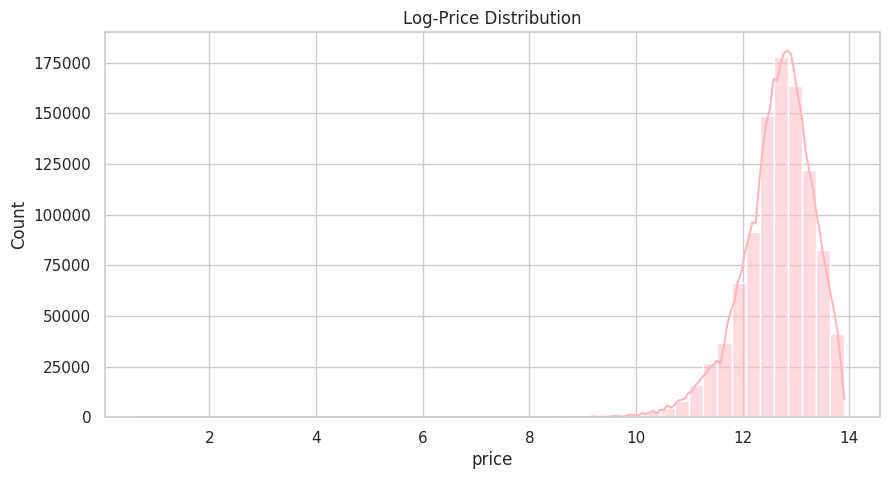

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


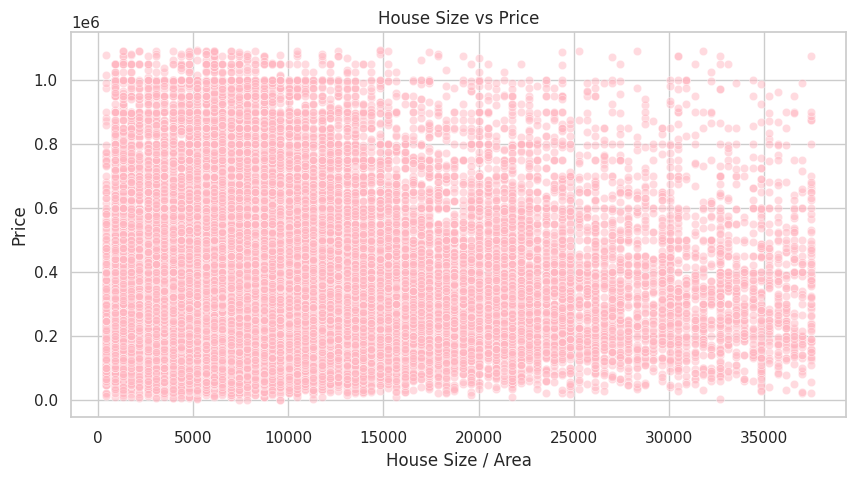

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


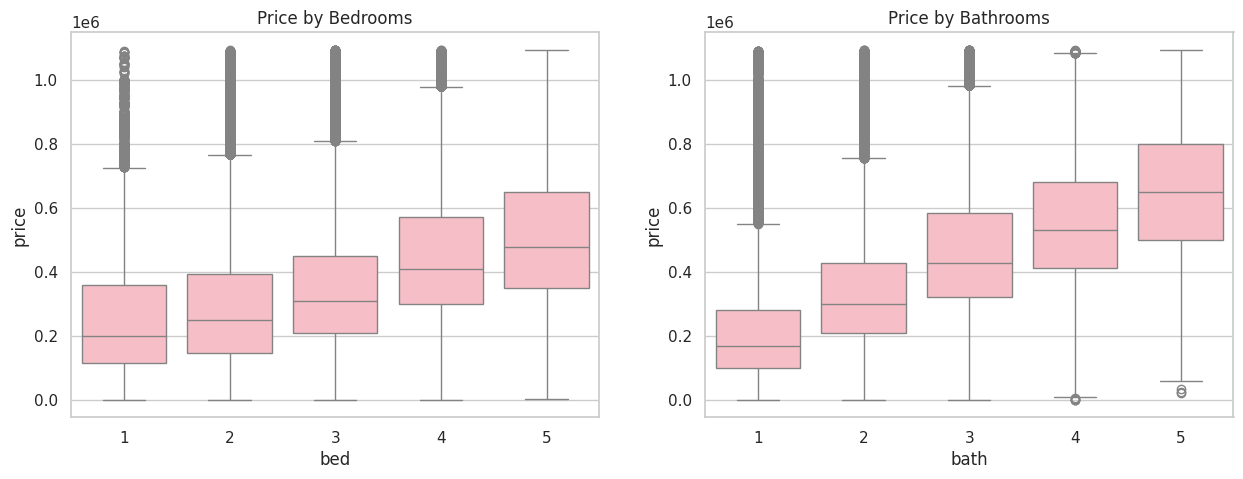

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


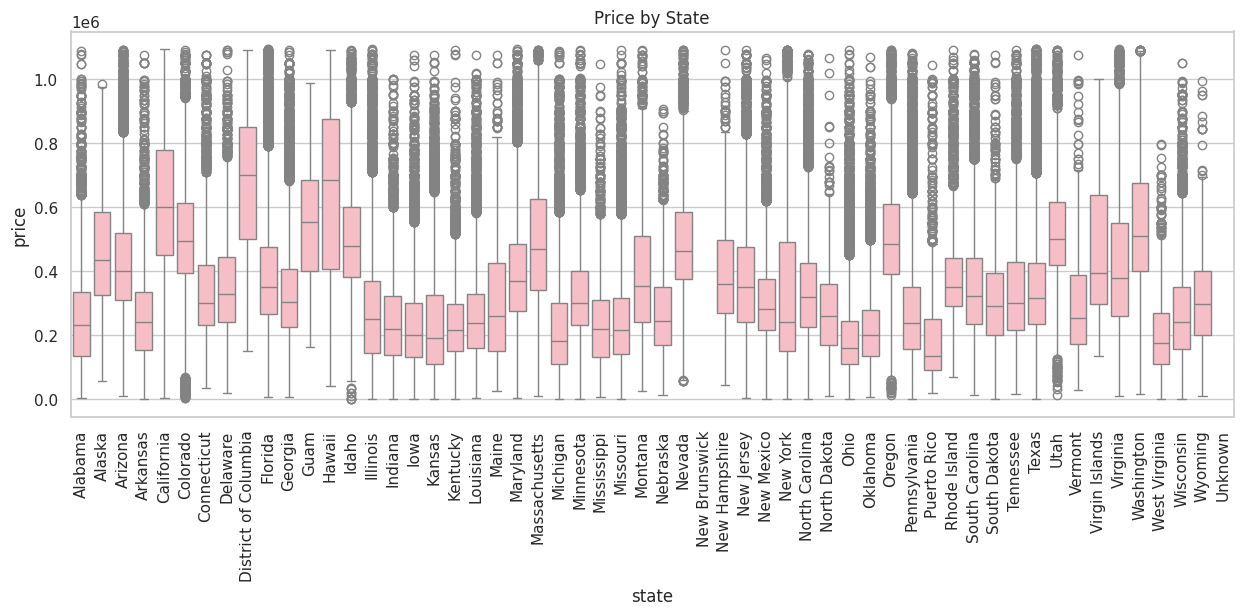

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


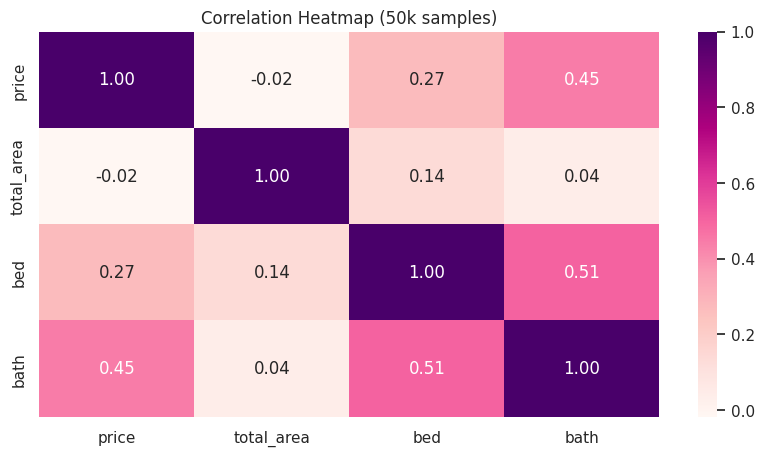

In [ ]:
# For cleaned dataset
from utils import eda
eda.run_eda(data_clean)

##Feature Engineering

In [118]:
#price per sq foot
data_clean['price_per_sqft'] = (data_clean['price'] / data_clean['house_size']).round(1)

#bath to bed ratio
data_clean['bed_bath_ratio'] = (data_clean.bed / data_clean.bath).round(1)

#lot to house size ratio
data_clean['lots_house_ratio'] = (data_clean.total_area / data_clean.house_size).round(1)

In [119]:
data_clean.head()

,brokered_by,status,price,bed,bath,total_area,street,city,state,zip_code,house_size,price_per_sqft,bed_bath_ratio,lots_house_ratio
0,103378.0,for_sale,105000.0,3,2,5227.2,1962661.0,Adjuntas,Puerto Rico,601,920.0,114.1,1.5,5.7
1,52707.0,for_sale,80000.0,4,2,3484.8,1902874.0,Adjuntas,Puerto Rico,601,1527.0,52.4,2.0,2.3
2,103379.0,for_sale,67000.0,2,1,6534.0,1404990.0,Juana Diaz,Puerto Rico,795,748.0,89.6,2.0,8.7
3,31239.0,for_sale,145000.0,4,2,4356.0,1947675.0,Ponce,Puerto Rico,731,1800.0,80.6,2.0,2.4
5,103378.0,for_sale,179000.0,4,3,20037.6,1850806.0,San Sebastian,Puerto Rico,612,2520.0,71.0,1.3,8.0


In [120]:
data_clean.price.median()

336990.0

In [121]:
# Log-transform the price to normalize the prices
data_clean['log_prices'] = np.log1p(data_clean.price).round(2)

In [122]:
#add pricing range for house affordable mid-range and luxury
data_clean['house_cat'] = pd.qcut(
    data_clean.price,
    q = 3,
    labels = ['affordable', 'mid-range', 'high-end'],
)

data_clean.house_cat.value_counts()

,count
house_cat,
affordable,331019
high-end,330764
mid-range,330739


In [123]:
data_clean.sample(5)

,brokered_by,status,price,bed,bath,total_area,street,city,state,zip_code,house_size,price_per_sqft,bed_bath_ratio,lots_house_ratio,log_prices,house_cat
1926165,52577.0,sold,714990.0,4,2,8276.4,1483876.0,Dallas,Texas,75214,2368.0,301.9,2.0,3.5,13.48,high-end
1471461,88180.0,sold,989000.0,1,1,14810.4,366448.0,New York City,New York,11217,1060.0,933.0,1.0,14.0,13.80,high-end
1445139,22654.0,sold,524900.0,4,2,26136.0,249510.0,North Kingstown,Rhode Island,2852,1244.0,421.9,2.0,21.0,13.17,high-end
1745598,25790.0,sold,318990.0,3,3,2613.6,415867.0,Kissimmee,Florida,34744,1568.0,203.4,1.0,1.7,12.67,mid-range
2116024,4522.0,sold,949900.0,3,3,2178.0,329378.0,Irvine,California,92604,1642.0,578.5,1.0,1.3,13.76,high-end


##Data Aggregation, Visualization and Hypothesis Testing

Text(0, 0.5, 'Frequency')

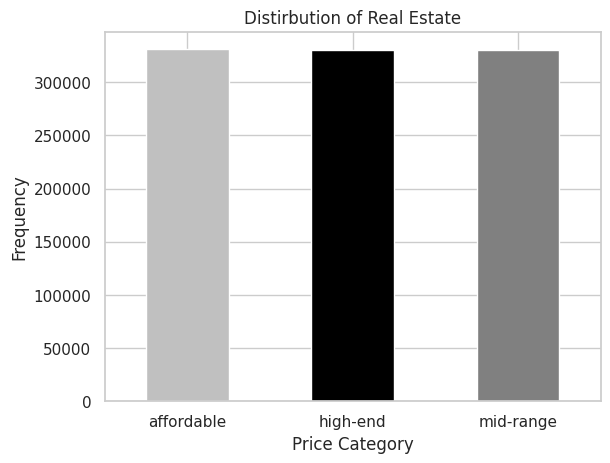

In [124]:
# Distribution of houses by category
#-----------------------------------
data_clean.house_cat.value_counts().plot.bar(color=['silver', 'black', 'grey'])
plt.title('Distirbution of Real Estate')
plt.xlabel('Price Category')
plt.xticks(rotation=0)
plt.ylabel('Frequency')

The data is now normally distributied across different price ranges.

Huypothesis: Since average cost of living in CA and NY is higher, the average cost of houses located in New York and California State is expected to be on the higher end as well.

In [125]:
np.ceil(data_clean.groupby('state')['price'].mean()).sort_values(ascending= False).reset_index().head(10)

,state,price
0,District of Columbia,685116.0
1,Hawaii,644741.0
2,California,611872.0
3,Guam,544604.0
4,Washington,544587.0
5,Utah,524836.0
6,Oregon,507496.0
7,Colorado,504521.0
8,Idaho,501400.0
9,Massachusetts,494160.0


Surprisingly average prices of real estate in NY does not make it in the top 10. It is very likely that the prices of real estate in NY City are very high but as you move further from the metro area the prices go down, that signinificantly decrease the overall avg price of real estate in NY. And the cost of living such as other expense being high is still stays true in NY.

Hypothesis 2: The land area in states with high average price of real estate must me lower.

In [126]:
np.ceil(data_clean.groupby('state')['total_area'].median()).sort_values(ascending= True).reset_index().head(10)

,state,total_area
0,District of Columbia,1743.0
1,Puerto Rico,4356.0
2,Utah,5663.0
3,Pennsylvania,6099.0
4,California,6534.0
5,Colorado,6534.0
6,Nevada,6534.0
7,Maryland,6970.0
8,Oregon,6970.0
9,Arizona,6970.0


As we can see, out of the 10 most expensive states, 5 also rank among those with the lowest average total land area. While this does not establish a causal relationship—i.e., higher prices causing smaller land areas—it suggests that other factors may be influencing housing costs. These could include state size, population density, the proportion of habitable land, and similar geographic or demographic characteristics.

In [127]:
data_clean.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'total_area', 'street',
       'city', 'state', 'zip_code', 'house_size', 'price_per_sqft',
       'bed_bath_ratio', 'lots_house_ratio', 'log_prices', 'house_cat'],
      dtype='object')

Hypothesis 3: Number of beds also increase the prices of houses.

In [128]:
import seaborn as sns

In [129]:
sample_data = data_clean.sample(n=10000, random_state=42)

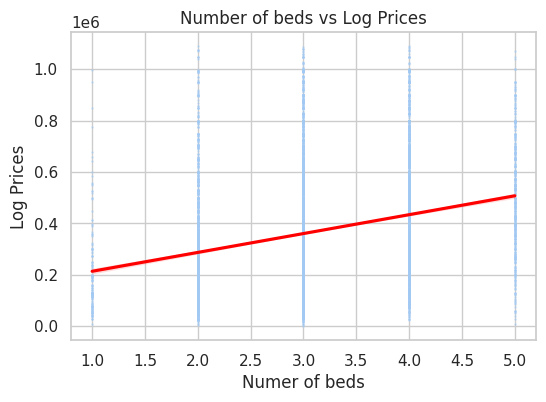

In [130]:
# Regression plot: Number of bedrooms vs. Price
# ---------------------------------------------
plt.figure(figsize=(6,4))
sns.regplot(
    x = 'bed',
    y = 'price',
    data = sample_data,
    scatter_kws = {'alpha':0.5, 's':0.5},
    line_kws = {'color':'red'}
)

plt.title('Number of beds vs Log Prices')
plt.xlabel('Numer of beds')
plt.ylabel('Log Prices')
plt.show()

Hypothesis 4: Larger house must have lower price per sq ft.

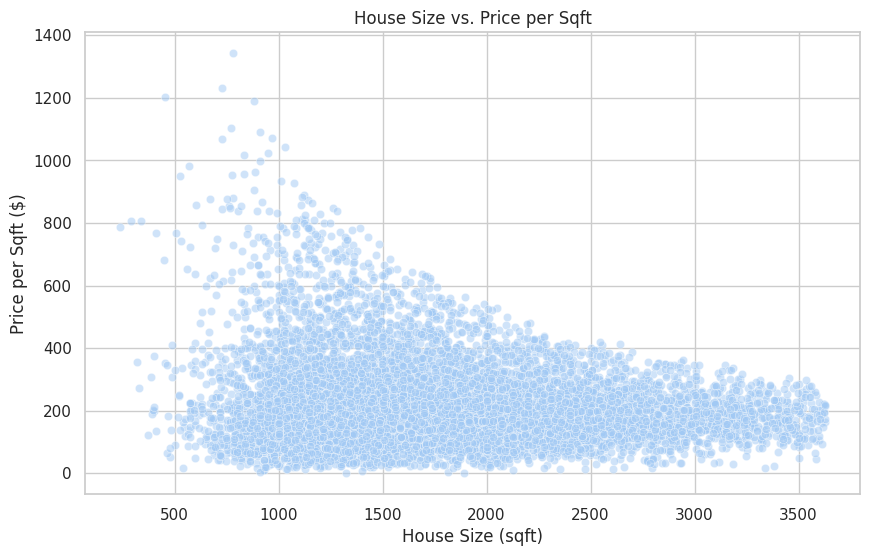

In [131]:
# Scatter plot: House size vs. Price per sqft
# -------------------------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=sample_data,
    x='house_size',
    y='price_per_sqft',
    alpha=0.5
)
plt.title('House Size vs. Price per Sqft')
plt.xlabel('House Size (sqft)')
plt.ylabel('Price per Sqft ($)')
plt.show()

## House Price Prediction Model

In [132]:
data_clean.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'total_area', 'street',
       'city', 'state', 'zip_code', 'house_size', 'price_per_sqft',
       'bed_bath_ratio', 'lots_house_ratio', 'log_prices', 'house_cat'],
      dtype='object')

In [133]:
#categorical features
cat = ['status','state','house_cat']

#numerical features
num  = ['bed', 'bath', 'total_area','house_size',
        'price_per_sqft','bed_bath_ratio', 'lots_house_ratio']

### Preprocessing

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [135]:
#encoding categorical variables
x_cat = pd.get_dummies(data_clean[cat], drop_first=True)
x_cat.shape

(992522, 60)

In [136]:
#normailze numerical variables
scaler = StandardScaler()
x_num = pd.DataFrame(scaler.fit_transform(data_clean[num]),
                     columns=num,
                     index=data_clean.index) #ensure index is set to df or concat does not work

x_num.shape

(992522, 7)

In [137]:
#combine to create X (feature variables)
X = pd.concat([x_num, x_cat], axis=1)
X.shape

(992522, 67)

In [138]:
#Target Variable
y = data_clean['price']
y.shape

(992522,)

In [139]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])
print("Feature columns:", X_train.shape[1])

Training samples: 744391
Test samples: 248131
Feature columns: 67


### Baseline Model

In [140]:
#Our base model shows typical error you’d get if you just predicted the median for every house.
baseline = y_train.median()
print(f"Baseline (median price): {baseline:,.2f}")

# Predict the median for all test samples
baseline_preds = np.ones_like(y_test) * baseline

# Compute RMSE for baseline
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_preds))
print(f"Baseline RMSE: {baseline_rmse:,.2f}")

Baseline (median price): 336,880.00
Baseline RMSE: 218,074.28


### Linear Regression Model

In [141]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#Predict the test set
lr_preds = lr_model.predict(X_test)

#Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
r2 = r2_score(y_test, lr_preds)

print(f"Linear Regression RMSE: {rmse:,.2f}")
print(f"Linear Regression R²: {r2:.4f}")

Linear Regression RMSE: 63,979.18
Linear Regression R²: 0.9110


### XGBoost Model

In [142]:
# Convert to NumPy arrays since Xgboost doesnt support pyarrow backend dtypes
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

In [143]:
from xgboost import XGBRegressor

# Initialize model
xgb_model = XGBRegressor(
    n_estimators=500,      # number of trees
    learning_rate=0.05,    # step size shrinkage
    max_depth=6,           # max depth of each tree
    subsample=0.8,         # subsample ratio for training
    colsample_bytree=0.8,  # subsample ratio for columns
    random_state=42,
    n_jobs=-1              # use all CPU cores
)


# Train the model
xgb_model.fit(X_train_np, y_train_np,
              eval_set=[(X_train_np, y_train_np)],
              verbose=50)

#Make predictions
xgb_preds = xgb_model.predict(X_test_np)

#Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test_np, xgb_preds))
r2 = r2_score(y_test_np, xgb_preds)

print(f"Linear Regression RMSE: {rmse:,.2f}")
print(f"Linear Regression R²: {r2:.4f}")

[0]	validation_0-rmse:204811.29057
[50]	validation_0-rmse:30503.07160
[100]	validation_0-rmse:13948.52076
[150]	validation_0-rmse:10284.14696
[200]	validation_0-rmse:9006.70641
[250]	validation_0-rmse:8268.14691
[300]	validation_0-rmse:7820.12555
[350]	validation_0-rmse:7469.62007
[400]	validation_0-rmse:7232.62173
[450]	validation_0-rmse:7041.61419
[499]	validation_0-rmse:6904.79869
Linear Regression RMSE: 7,755.51
Linear Regression R²: 0.9987


In [144]:
# Get feature importances (gain)
importance_dict = xgb_model.get_booster().get_score(importance_type='gain')

# Convert to DataFrame
feat_imp = pd.DataFrame({
    'feature': list(importance_dict.keys()),
    'gain': list(importance_dict.values())
})
# Convert gain to percentage
feat_imp['gain_pct'] = 100 * feat_imp['gain'] / feat_imp['gain'].sum()

In [145]:
# Map 'f#' to actual feature names
feat_imp['feature_name'] = feat_imp['feature'].apply(lambda x: X_train.columns[int(x[1:])])

#Comprehension work flow
# -> get string after first character for item in feature
# -> convert it to int
# -> get item using the int as index from X_train.columns
# -> append it corresponding to its feature applies it every row of the series

# Sort and take top 5
top = feat_imp.sort_values('gain_pct', ascending=False).head(10)
top

,feature,gain,gain_pct,feature_name
57,f66,1.139801e+14,72.658653,house_cat_high-end
56,f65,1.572440e+13,10.023799,house_cat_mid-range
4,f4,6.033898e+12,3.846415,price_per_sqft
11,f13,5.858409e+12,3.734547,state_California
3,f3,3.404036e+12,2.169963,house_size
1,f1,2.637551e+12,1.681354,bath
52,f60,2.592059e+12,1.652354,state_Washington
9,f11,1.362978e+12,0.868855,state_Arizona
26,f31,1.331577e+12,0.848837,state_Massachusetts
42,f48,5.841787e+11,0.372395,state_Oregon


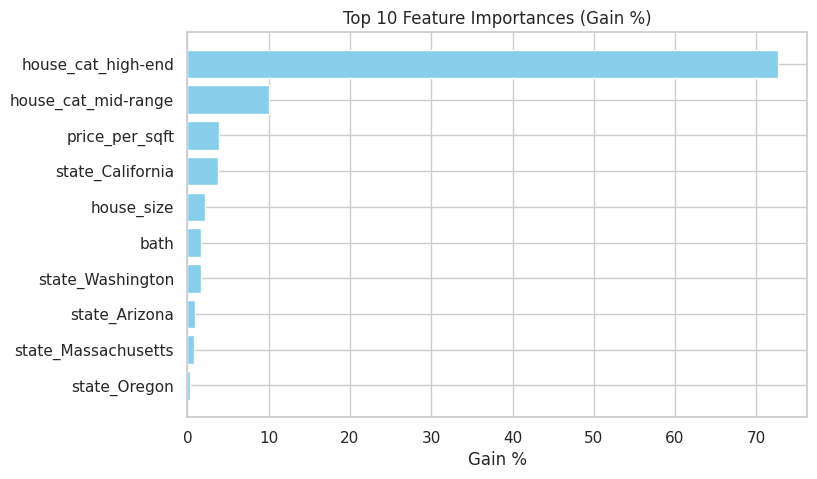

In [146]:
# Plot most important features
plt.figure(figsize=(8,5))
plt.barh(top['feature_name'], top['gain_pct'], color='skyblue')
plt.xlabel('Gain %')
plt.title('Top 10 Feature Importances (Gain %)')
plt.gca().invert_yaxis()
plt.show()

While the model demonstrates strong predictive performance, closer inspection reveals some issues with how it is learning. Firstly, it heavily relies on features derived from the target variable itself, such as house_cat and price_per_sqft. These features effectively encode the house price directly, allowing the model to “cheat” rather than learn genuine predictive patterns, which inflates performance metrics and can lead to overfitting.  
  
Secondly, one-hot encoding of high-cardinality categorical variables, such as state, introduces another artifact. Converting state into 50+ binary columns (e.g., state_Cali, state_Washington, state_New_York) causes XGBoost to assign very high importance to individual one-hot columns. While each column has some predictive power, collectively they represent a single feature, so this approach fragments importance and gives a misleading picture of which features truly drive predictions.  
  
By instead passing categorical features directly as pandas.Categorical and scaling only numeric features, XGBoost can handle splits natively. This reduces false importance inflation, mitigates overfitting from derived variables, and provides more interpretable feature importances that reflect genuine predictive power.

### Final Adjusted XGBoost Model

In [147]:
# --- Numeric columns ---
num = ['bed', 'bath', 'total_area','house_size',
       'bed_bath_ratio', 'lots_house_ratio']

# Ensure numeric columns are float64
data_clean[num] = data_clean[num].astype('float64')

# --- Categorical columns ---
cat = ['status','state','zip_code','city']

# Ensure categorical columns are pandas Categorical
data_clean[cat] = data_clean[cat].astype('category')

# Scale numeric features
scaler = StandardScaler()
X_num = pd.DataFrame(scaler.fit_transform(data_clean[num]),
                     columns=num, index=data_clean.index)

# Combine numeric + categorical (as-is)
X = pd.concat([X_num, data_clean[cat]], axis=1)

# Target variable
y = data_clean['price'].astype('float64')  # ensure float dtype

# Ensure X and y are pandas objects with proper dtypes
print(f'Data Types for features: \n {X.dtypes}')
print(f'Data type for target: \n {y.dtypes}')

print('-'*50)

#test train split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])
print("Feature columns:", X_train.shape[1])

Data Types for features: 
 bed                  float64
bath                 float64
total_area           float64
house_size           float64
bed_bath_ratio       float64
lots_house_ratio     float64
status              category
state               category
zip_code            category
city                category
dtype: object
Data type for target: 
 float64
--------------------------------------------------
Training samples: 744391
Test samples: 248131
Feature columns: 10


In [148]:
# Initialize model
xgb_model = XGBRegressor(
    enable_categorical = True,
    n_estimators=500,      # number of trees
    learning_rate=0.05,    # step size shrinkage
    max_depth=6,           # max depth of each tree
    subsample=0.8,         # subsample ratio for training
    colsample_bytree=0.8,  # subsample ratio for columns
    random_state=42,
    n_jobs=-1              # use all CPU cores
)


# Train the model
xgb_model.fit(X_train, y_train,
              eval_set=[(X_train, y_train)],
              verbose=50)

#Make predictions
xgb_preds = xgb_model.predict(X_test)

#Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
r2 = r2_score(y_test, xgb_preds)

print(f"Linear Regression RMSE: {rmse:,.2f}")
print(f"Linear Regression R²: {r2:.4f}")

[0]	validation_0-rmse:208730.35772
[50]	validation_0-rmse:115748.21349
[100]	validation_0-rmse:105671.45833
[150]	validation_0-rmse:101649.79898
[200]	validation_0-rmse:98498.74551
[250]	validation_0-rmse:95719.46249
[300]	validation_0-rmse:93305.16691
[350]	validation_0-rmse:91316.39236
[400]	validation_0-rmse:89544.42031
[450]	validation_0-rmse:87925.50172
[499]	validation_0-rmse:86692.44233
Linear Regression RMSE: 93,319.51
Linear Regression R²: 0.8107


  feature_name          gain  gain_pct
7        state  5.222134e+13     48.67
1         bath  2.319576e+13     21.62
3   house_size  1.071330e+13      9.98
9         city  7.160916e+12      6.67
8     zip_code  7.052863e+12      6.57
--------------------------------------------------


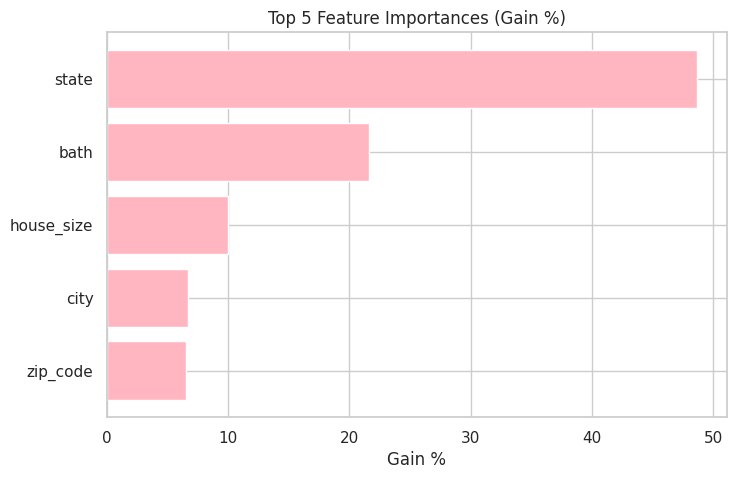

In [150]:
# Get feature importances (gain)
importance_dict = xgb_model.get_booster().get_score(importance_type='gain')

# Convert to DataFrame
feat_imp = pd.DataFrame({
    'feature_name': list(importance_dict.keys()),  # use keys directly
    'gain': list(importance_dict.values())
})

# Convert gain to percentage
feat_imp['gain_pct'] = round(100 * feat_imp['gain'] / feat_imp['gain'].sum(),2)

# Sort and take top 5
top = feat_imp.sort_values('gain_pct', ascending=False).head(5)

print(top)
print('-'*50)
# Plot
plt.figure(figsize=(8,5))
plt.barh(top['feature_name'], top['gain_pct'], color='#FFB6C1')
plt.xlabel('Gain %')
plt.title('Top 5 Feature Importances (Gain %)')
plt.gca().invert_yaxis()
plt.show()


## Conclusion
The final model demonstrates strong predictive performance, with a Linear Regression RMSE of $93,319.51 and an R² of 0.811, indicating that it captures approximately 81% of the variance in house prices. This suggests that the model is able to explain most of the variation in pricing across different properties using the selected features.  
  
Looking at feature importance from the XGBoost model, the model relies primarily on location-related features (state, city, zip_code), followed by property-specific attributes such as bath and house_size. Notably, state alone accounts for nearly 49% of the total gain, highlighting the strong influence of geographic factors on house prices. Other numeric features like bath and house_size also contribute meaningfully, reflecting the intuitive impact of property characteristics on price.  
  
By keeping categorical features as native categories rather than one-hot encoding and excluding features derived directly from the target (e.g., house_cat, price_per_sqft), the model avoids overfitting and inflated feature importance. This ensures that the importance scores are interpretable and the model’s predictions are based on genuine predictive signals rather than artifacts.  
  
Overall, the model captures the major determinants of house pricing effectively and provides a robust baseline for further refinement, while remaining interpretable and generalizable.